## Probabilité d'absorption


In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3,suppress=True)
plt.style.use("default")
from IPython.display import Image

### Classe absorbante


Quand l'espace d'état est réductible on peut le séparer en "classes": une classe étant un ensemble irréductible d'états.


Une classe absorbante est une classe dont on ne peut pas sortir.


Quand on a une chaine réductible, la bonne questions à se posser c'est "quelle est la probabilité qu'elle finisse dans telle ou telle classe absorbante".

Remarquons que pour répondre à cette question, on peut tout à fait remplacer chaque classe absorbante par un unique état (voir dessins).


Pour cette raison, dans la suite, nous ne considérons que des états absorbants.




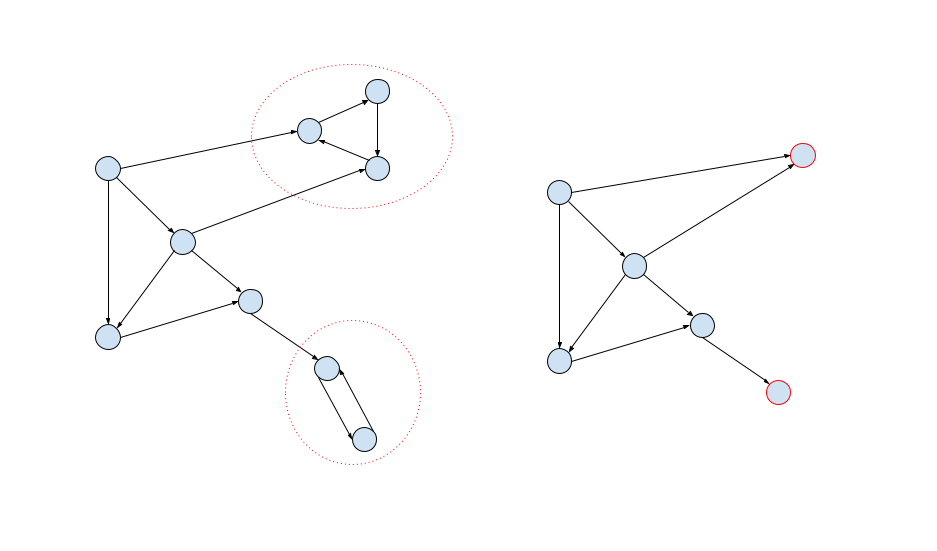

### État absorbant


> ***Définition:*** Un état absorbant est un état duquel la chaine ne peut pas sortir.


> ***Proposition:*** Si $a$ est un état absorbant alors la probabilité $\delta_a$ est une probabilité invariante.


#### ♡♡

*Démonstation:*



### Étude d'un cas: la marche absorbée


Dans toute la suite, nous travaillons avec la marche aléatoire sur $\{0,...,n-1\}$ absorbée en $0$ et $n-1$. C'est un exemple réductible, et la proposition précédente nous indique qu'elle admet a moins 2 mesure invariantes linéairement indépendantes. En observant un peu la matrice $P-I$ on voit qu'elle est de rang $n-2$, donc l'espace des mesures invariantes est exactement de dimension 2.  



L'objectif de ce cours est de calculer quelle est la probabilité que la marche aléatoire finisse sa vie en l'un ou l'autre de ces points absorbant. La méthodologie que nous allons utiliser se généralise à n'importe quelle chaine de Markov avec des points absorbant. Et même à n'importe quelle chaine de Markov avec des "zones absorbante" (vue qu'on peu remplacer ces zones par des points).  







> ***Proposition:*** La marche aléatoire absorbée converge presque surement en $0$ ou en $n-1$.



*Démonstration:* Fixons $x \in \{1,...,n-2\}$. Quand la chaine est en $x$ à un instant $t$, la probabilité $p$ de toucher le haut ou le bas sans jamais être revenu en $x$ est strictement positive. En effet, cette proba est plus grande que la proba de monter à chaque instant après $t$, donc:
$$
p > P(x,x+1)\times P(x+1,x+2)\times ... \times P(n-2,n-1) >0
$$
Donc la probabilité $q=1-p$ que la chaine retourne en $x$ dans le futur est stritement inférieure à $1$. De plus, par la propriété de Markov, à chaque passage en $x$, l'évènement "revenir en $x$" est indépendant du passé, et a pour probabilité $q$. Le nombre de passage en $x$ suit donc une loi géométrique de paramètre $p=1-q$, c'est donc une variable aléatoire finie. Si la chaine ne peut rester indéfiniment dans aucun état du milieu, c'est qu'elle finit sa vie sur les bords.

### Simulation

Vérifions que des simulations de la marche aléatoire absorbée convergent bien vers $0$ ou $n-1$, et ce quel que soit le point de départ :

In [2]:
"une fonction qui simule une chaine de Markov à partir de sa matrice de transition"
def markov_from_P(t_max,P,x0):
    X=np.zeros(t_max,dtype=int)
    X[0]=x0
    for t in range(t_max-1):
        X[t+1]=np.random.choice(a=range(len(P)),p=P[X[t],:])
    return X

In [3]:
#donne ma matrice de transition
def marche_absorb(n):
    P=np.zeros([n,n])
    for i in range(1,n-1):
        P[i,i+1]=0.5
        P[i,i-1]=0.5
    P[0,0]=1
    P[-1,-1]=1
    return P

t_max=150
nb_essaies=10
plt.figure(figsize=(10,3))
plt.grid()
n=21
P=marche_absorb(n)
for i in range(nb_essaies):
    X=markov_from_P(t_max,P,n//2)
    plt.plot(range(t_max),X)

#### ♡♡♡

Observons que plus on part proche d'un point absorbant, et plus on a de chance d'y finir sa vie.

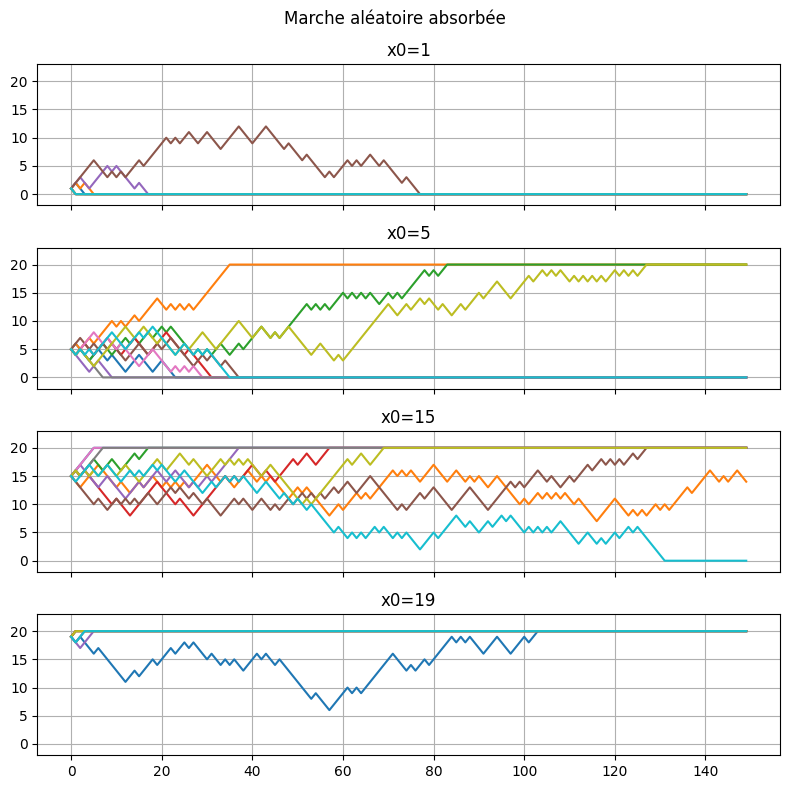

In [8]:
#--- To keep following outputs, do not run this cell! ---

 Essayons de quantifier cela numériquement:

 On va utiliser la technique de Monte Carlo pour estimer la probabilité d'absorbtion en 0. Attention, on ne peut pas utiliser la même technique que précédemment, car on veut pousser les simulations jusqu'à ce qu'il y ait absorbtion. Dans le programme, il faudra donc une boucle while.

In [10]:
def freq_absorb_zero(n, x0, n_essaie=500):
    assert x0 >= 0 and x0 <= n-1, "x0 doit être compris entre 0 et n-1"
    res = 0
    for _ in range(n_essaie):
        x = x0
        while x != 0 and x != n-1:


In [11]:
n = 21
freq = np.zeros(n)
for x0 in range(n):
    freq[x0] = freq_absorb_zero(n,x0)

fig,ax=plt.subplots()
ax.set_title(r"Proba que la chaîne soit absorbée en 0 en fonction de $x_0$")
ax.plot(range(n), freq, '.');

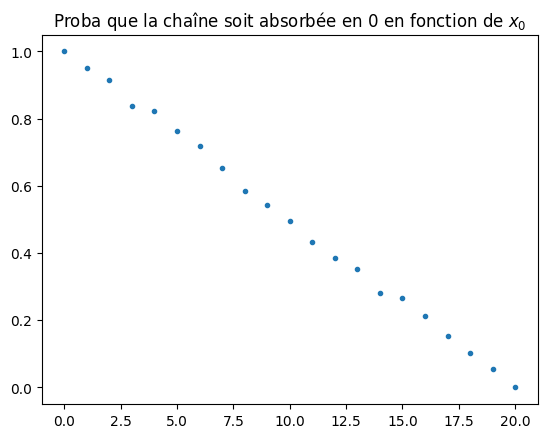

In [11]:
#--- To keep following outputs, do not run this cell! ---

On serait tenté de dire que la chaîne est absorbée en $0$ avec probabilité $\frac{n - 1 - X_0}{n-1}$.

### Calcul exact de la probabilité d'absorption






Notons $\gamma_0(x)=\mathbf P[X_\infty =0/X_0=x]$.


> ***Lemme:*** Le vecteur (colonne) $\gamma_0$ vérifie $P\gamma_0=\gamma_0$.


*Démonstration:* Comme d'habitude on note $\mathbf P_y[\cdot]=\mathbf P[\cdot / X_0=y]$. La démonstration n'est qu'un calcul:

\begin{align*}
P\gamma_0(x) &= \sum_y P(x,y) \gamma_0(y) \\
&= \sum_y P(x,y) \mathbf P_y[\lim_t X_t = 0   ]    \\
&= \sum_y P(x,y) \mathbf P_y[\exists t X_t = 0   ]    \\
&= \sum_y P(x,y) \mathbf P_y[\cup_t \{X_t = 0\}   ]    \\
&= \sum_y P(x,y)  \lim_t \mathbf P_y[X_t = 0   ]  \\
&= \lim_t \sum_y P(x,y) \mathbf P_y[X_t = 0   ]  \\
&= \lim_t \mathbf P_x[X_{t+1} = 0] \\
&= \mathbf P_x[\lim_t X_{t+1} = 0] \\
&= \gamma_0(x) \\
\end{align*}

Pour intervertir les symboles $\mathbf P$ et $\lim_t$, on a utilisé la "continuité" des probas, à savoir: Si $(A_n)$ est une suite croissante d'évènements, alors $\mathbf P[\cup_n A_n]= \lim_n \mathbf P[ A_n]$.


Ainsi, le vecteur $\gamma_0$ vérifie $P\gamma_0 = \gamma_0$. Autrement dit, $\gamma_0$ est un vecteur du sous-espace propre de $P$ associé à la valeur propre 1 : $\gamma_0\in\ker(P-I)$. La fonction `np.linalg.eig` permet de trouver une base $(v_1, v_2)$ de ce sous-espace : ce sont les vecteurs propres associés à la valeur propre 1, appelés `f` et `g` dans le code ci-dessous. Ainsi $\gamma_0$ est une combinaison linéaire de $v_1$ et $v_2$, et s'écrit donc $\gamma_0 = a v_1 + b v_2$, où $a$ et $b$ sont deux inconnues réelles à déterminer.

Or les égalités $\gamma_0(0) = 1$ et $\gamma_0(n-1) = 0$ donnent justement deux équations :
\begin{align*}
&
\left\{
\begin{array}{l c l c l}
a v_1(0) &+& b v_2 (0) &=& 1 \\
a v_1(n-1) &+& b v_2(n-1) &=& 0
\end{array}
\right.
\\
\Longleftrightarrow
&
\underbrace{
\left(
\begin{array}{c c}
v_1(0) & v_2(0) \\
v_1(n-1) & v_2(n-1) \\
\end{array}
\right)
}_{M}
\left(
\begin{array}{c c}
a \\
b
\end{array}
\right)
=
\left(
\begin{array}{c c}
1 \\
0
\end{array}
\right)
\\
\Longleftrightarrow
&
\left(
\begin{array}{c c}
a \\
b
\end{array}
\right)
=
M^{-1}
\left(
\begin{array}{c c}
1 \\
0
\end{array}
\right)
\end{align*}
On détermine ainsi $a$ et $b$, et donc $\gamma_0$.

In [ ]:
n=50
P=marche_absorb(n)

val_pr,vec_pr=np.linalg.eig(P)
val_pr=np.real(val_pr)
vec_pr=np.real(vec_pr)

""" on voit qu'il y a 2 vecteurs propres associés à la valeur propre 1.
Attention, ils sont situés à la fin de la matrice!
On les notes f et g"""
print("val_pr\n",val_pr)
print("vec_pr\n",vec_pr)
f=vec_pr[:,-1]
g=vec_pr[:,-2]
print("f:",f)
print("g:",g)

M=np.array([[f[0],g[0]],[f[n-1],g[n-1]]])
print("M\n",M)
ab=np.linalg.inv(M) @ [1,0]
gamma=ab[0]*f+ab[1]*g

plt.plot(range(n),gamma,".")
plt.title("proba de finir en 0 en fonction du point de départ");

Comparons ces résultats théoriques aux résultats obtenus précédemment.

In [ ]:
n=21
P=marche_absorb(n)

val_pr,vec_pr=np.linalg.eig(P)
val_pr=np.real(val_pr)
vec_pr=np.real(vec_pr)

f=vec_pr[:,-1]
g=vec_pr[:,-2]

M=np.array([[f[0],g[0]],[f[n-1],g[n-1]]])
ab=np.linalg.inv(M) @ [1,0]
gamma=ab[0]*f+ab[1]*g

plt.plot(range(n),gamma, label="théorique")
plt.plot(range(n),freq,".", label="empirique")
plt.title("Proba que la chaîne soit absorbée en 0 en fonction de x0")
plt.legend();


Le programme précédent n'est pas très robuste car les vecteurs propres  proposés par `np.linalg.eig` sont classés dans un ordre que nous ne maitrisons pas. Rendez-le robuste.

In [ ]:
#until:
def compute_gamma0(P):
    val_pr,vec_pr=np.linalg.eig(P)
    val_pr=np.real(val_pr)
    vec_pr=np.real(vec_pr)

    to_sort=np.argsort(-val_pr)

    f=vec_pr[:,to_sort[0]]
    g=vec_pr[:,to_sort[1]]

    M=np.array([[f[0],g[0]],[f[n-1],g[n-1]]])
    ab=np.linalg.inv(M) @ [1,0]
    gamma_0=ab[0]*f+ab[1]*g
    return gamma_0

In [ ]:
compute_gamma0(marche_absorb(n))

In [ ]:
#--- To keep following outputs, do not run this cell! ---

array([1.   , 0.98 , 0.959, 0.939, 0.918, 0.898, 0.878, 0.857, 0.837,
       0.816, 0.796, 0.776, 0.755, 0.735, 0.714, 0.694, 0.673, 0.653,
       0.633, 0.612, 0.592, 0.571, 0.551, 0.531, 0.51 , 0.49 , 0.469,
       0.449, 0.429, 0.408, 0.388, 0.367, 0.347, 0.327, 0.306, 0.286,
       0.265, 0.245, 0.224, 0.204, 0.184, 0.163, 0.143, 0.122, 0.102,
       0.082, 0.061, 0.041, 0.02 , 0.   ])

### Généralisation avec $p$ points absorbants


 Par analogie avec le raisonnement précédent: on aura un espace propre de dimension $p$. Donc on aura $p$ solutions linéairement indépendantes. Par ailleurs, on aura $p$ conditions qui permettrons de trouver la solution unique. Détaillons.

Notons $E = \{1, 2, …, n\}$ l'ensemble des états possibles, et soient $i_1, … i_p$ les états absorbants. Comme précédemment, on note $\gamma_{i_k}$ le vecteur des probabilités que la chaîne soit absorbée en $i_k$ en fonction du point de départ $x$, avec $k\in\{1, …, p\}$ :
$$
\gamma_{i_k}(x) = \mathbf P_x[X_\infty=i_k]
$$
Par symétrie des rôles joués par $i_1$, …, $i_p$, on peut se contenter de traiter le cas de $\gamma_{i_1}$ pour simplifier les explications.

Toujours comme dans le cas particulier, $\gamma_{i_1}\in\ker(P-I)$. Or $\ker(P-I)$ va être un sous-espace de dimension $p$, qui admet donc une base $(v_1, …, v_p)$ obtenue à l'aide de `np.linalg.eig`. Ainsi $\gamma_{i_1} = a_1 v_1 + \cdots + a_p v_p$ où $a_1, …, a_p$ sont $p$ inconnues réelles à déterminer. Mais comme les états $i_1, …, i_p$ sont absorbants, on a $\gamma_{i_1}(i_1) = 1$ et pour tout $j>1, \gamma_{i_1}(i_j) = 0$, ce qui nous donne $p$ équations :
\begin{align*}
&
\left\{
\begin{array}{l c l c l}
a_{i_1} v_{i_1}(i_1) &+ \cdots +& a_{i_p} v_{i_p} (i_1) &=& 1 \\
a_{i_1} v_{i_1}(i_2) &+ \cdots +& a_{i_p} v_{i_p}(i_2) &=& 0\\
&\vdots&&\vdots&\\
a_{i_1} v_{i_1}(i_p) &+ \cdots +& a_{i_p} v_{i_p}(i_p) &=& 0\\
\end{array}
\right.
\\
\Longleftrightarrow
&
\underbrace{
\left(
\begin{array}{c c c}
v_{i_1}(i_1) & \cdots & v_{i_p}(i_1) \\
v_{i_1}(i_2) & \cdots & v_{i_p}(i_2) \\
&\vdots&\\
v_{i_1}(i_p) & \cdots & v_{i_p}(i_p) \\
\end{array}
\right)
}_{M}
\left(
\begin{array}{c c}
a_1 \\
a_2 \\
\vdots\\
a_p\\
\end{array}
\right)
=
\left(
\begin{array}{c c}
1 \\
0 \\
\vdots \\
0
\end{array}
\right)
\\
\Longleftrightarrow
&
\left(
\begin{array}{c c}
a_1 \\
a_2 \\
\vdots\\
a_p\\
\end{array}
\right)
=
M^{-1}
\left(
\begin{array}{c c}
1 \\
0 \\
\vdots \\
0
\end{array}
\right)
\end{align*}
On détermine ainsi $a_1, ..., a_p$, et donc $\gamma_{i_1}$.

À noter que pour déterminer $\gamma_{i_k}$ avec $k \neq 1$, la technique est exactement la même et seule la position du 1 dans le second membre change.

## Estimation de la matrice de transition

### Avec une seule trajectoire


Quelqu'un a simulé une chaine de Markov $X=(X_0,...,X_T)$  jusqu'à un temps $T$ assez grand. Il vous donne cette trajectoire numériquement sous la forme d'un vecteur.




***A vous:*** Quelle formule utiliseriez-vous  pour estimer les probabilités de transition $P(x,y)$ de cette chaine. Aide: c'est la formule la plus naturelle. Vous pouvez même l'écrire sans symbole mathématique.

***Réponse:*** Considérons un compteur d'occupation
$$
OC_T(x) = \sum_{t=0}^{T-1}  1_{\{X_t = x\}}.
$$
et un compteur de transition
$$
TR_T(x,y)= \sum_{t=0}^{T-1} 1_{\{X_t = x\}} 1_{\{X_{t+1} = y\}},
$$
La proportion de transition de $x$ vers $y$, sur un long bout de trajectoire $X_0,...,X_{T-1}$ est donnée par
$$
P_T(x,y)=\frac{TR_T(x,y)}{OC_T(x)}
$$
Quand la chaine est irréductible, elle visite tous les états régulièrement, et ce $P_T$ est proche de la matrice de transition $P$.  Un théorème nous indique même qu'il y a convergence quand $T\to \infty$.

### Avec plusieurs trajectoires




***A vous:*** Notons $P_T(x,y)$ l'estimation précédente. Est-ce qu'elle converge  toujours vers $P(x,y)$ quand $T$ temps vers l'infini?


***Réponse:*** Cela fonctionne pas pour une chaine réductible. Par exemple, pour la marche aléatoire absorbée: elle finie sa vie rapidement en $0$ ou $n-1$, et la quantité $P_T$ ne peut converger vers $P$.








***A vous:*** Maintenant, si vous disposez de plusieurs réalisations d'une chaine de Markov $X^0,X^1,X^2...$, quelle meilleure estimation de matrice de transition pourriez-vous faire?

***Réponse:*** En considérant une suite de trajectoire $(X^1,...,X^M)$, on peut compter sur l'ensemble des trajectoires:
$$
OC_T(x) = \sum_{m=1}^M \sum_{t=0}^{T-2}  1_{\{X^m_t = x\}},
$$
et
$$
TR_T(x,y)= \sum_{m=1}^M \sum_{t=0}^{T-1} 1_{\{X^m_t = x\}} 1_{\{X^m_{t+1} = y\}}.
$$
En supposant que l'on prenne $M$ et $T$ suffisament grand, le rapport des deux sera proche de la matrice de transition.




### Codons

In [ ]:
"""renvoie l'estimation des probas de transition  """
def P_from_Markov(Xs):
    state_size=np.max(Xs)+1
    transi_count=np.zeros([state_size,state_size])
    occupation_count=np.zeros([state_size])
    for X in Xs:
        for x in range(state_size):
            occupation_count[x]+=np.sum(X[:-1]==x)
            for y in range(state_size):
                transi_count[x,y]+=np.sum((X[:-1]==x) & (X[1:]==y))

    "transi_count[i,j]/occupation_count[i]"
    return transi_count/(occupation_count[:,np.newaxis]+1e-10)

On prend une matrice de transition au hasard:

In [ ]:
state_size=4
P=np.random.rand(state_size,state_size)
P/=np.sum(P,axis=1,keepdims=True)
P

In [ ]:
n_essaie=100
tmax=400
Xs=[]
for _ in range(n_essaie):
    x0=np.random.randint(state_size)
    X=markov_from_P(tmax,P,x0)
    Xs.append(X)
Xs=np.stack(Xs)
Xs.shape

In [ ]:
P_from_Markov(Xs)

## Conditionner une chaine par sa fin $\flat$


Jusqu'à présent, nous avons conditionner les chaines de Markov à naitre à un endroit précis: nous considérions  les familles
$$
\Big( \mathbf P[\cdot / X_0=x] : x \in E \Big)
$$

Dans cette partie on va voir que quand une chaine de Markov meurt (ex: par absorbtion), on peut aussi la conditionner à mourir en un point précis. La chaine conditionnée sur ces deux bouts est appelée un "pont".



### $h$-Transformation



Pour $x,y \in \{0,...,n-2\}$ on a:
\begin{align*}
\mathbf P_x[X_1=y / X_\infty=0] &= \frac{ \mathbf P_x[X_1=y , X_\infty=0]}{\mathbf P_x[X_\infty=0]}\\
&= \frac{ \mathbf P_x[X_1=y , X_\infty \circ \theta_1 =0]}{\gamma_0(x)}\\
&= \frac{ \mathbf P_x[X_1=y ] \mathbf P_y[X_\infty=0]}{\gamma_0(x)}\\
&=\frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)
\end{align*}



Itérons:
\begin{align*}
& \mathbf P_x(X_1 = y, X_2 = z / X_\infty = 0) \\
&= \frac{\mathbf P_x(X_1 = y, X_2 = z, X_\infty = 0) }{ \mathbb P_x( X_\infty = 0) } \\
&= \frac{ \mathbf P_x(X_1 = y) \mathbf P_y(X_1 = z) \mathbf P_z (X_\infty = 0) }{ \gamma_0(x) } \\
&= \frac{\gamma_0(z)}{\gamma_0(x)} P(x,y) P(y,z)\\
&= \frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)\frac{\gamma_0(z)}{\gamma_0(y)} P(y,z)
\end{align*}


ainsi on voit que le processus $X$ conditionné à finir sa vie en $0$ est une chaine de Markov sur $\{0,...,n-2\}$ ayant comme matrice de transition $(x,y) \to \frac{\gamma_0(y)}{\gamma_0(x)} P(x,y)$.

Cette transformation de $P$ s'appelle une $h$-transformation.



### Estimation pour la marche conditionnée à finir en 0


***A nous:***   

*   Simulones  plusieurs fois  la marche aléatoire absorbée, conditionnée à être absorbée en 0,  en utilisant l'algorithme du rejet: il s'agit de simuler la chaine jusqu'à ce qu'elle touche 0 ou $n-1$, et de ne garder que les cas où elle touche $0$ en premier.

*  À partir des simulations précédentes, faisons en sorte que notre chaine soit toujours de longueur $T$: ou bien vous devez couper, ou bien vous devez rallonger avec des zéros.  

*   Estimons la matrice de transition de cette chaine conditionnée

* Comparons notre estimation avec la matrice théorique donnée par la $h$-transformation.


*Remarques:* La seconde étape peut vous paraitre supperflux. On pourrait imaginer qu'on fasses des simulations jusqu'au temps d'absorbtion, puis qu'on établisse l'estimation de $P$ à partir des ces bouts de chaines de Markov. Mais ce serait une erreur: on aurait une estimation biaisée de la matrice de transition, car les trajectoires qui ont tenue le plus longtemps avant d'être absorbée seraient sur-représentée.

In [ ]:
"""Simulation d'une chaine de Markov absorbée en 0 ou n-1, conditionnée à finir en 0.
Le programme renvoit la chaine jusqu'au temps d'absorption.
"""
def marche_simple_absorbee_conditionnee(x0, n):

    assert x0 < n-1, "x0 doit être strictement inférieur à n-1"

    X = [x0]
    while X[-1] != 0:
        X.append(X[-1] + np.random.choice([-1,1]))
        #Si on arrive en n-1, on recommence
        if X[-1] == n-1:
            X = [x0]

    # Pour que la trajectoire contienne l'information P(0,0)=1
    X.append(0)

    return X


"""Cette fonction renvoie la chaine absorbée de t=0 à t=T-1.
Si le temps d'absorption est <T-1, elle rajoute des zéro (ce qui est naturel puisque la marche est absorbée en zéro)
 """
def coupe_en_T(X,T):
    res=np.zeros([T])
    min_len=min(len(X),T)
    res[:min_len]=X[:min_len]
    return res


In [ ]:
n = 8
M = 5000
x0 = n//2
T=20
Xs=np.zeros([M,T],dtype=int)

for i in range(M):
    X=marche_simple_absorbee_conditionnee(x0, n)
    X_T=coupe_en_T(X,T)
    Xs[i,:]=X_T

P_emp=P_from_Markov(Xs)
P_emp

On peut comparer cette matrice à la matrice théorique :

In [ ]:
def P_h_transfo(n):

    P = marche_absorb(n)
    gamma = compute_gamma0(P)

    Ph = np.zeros((n-1,n-1))
    for x in range(n-1):
        for y in range(n-1):
            Ph[x,y] = gamma[y] / gamma[x] * P[x,y]

    return Ph

P_h=P_h_transfo(n)

In [ ]:
import pandas as pd
P_h_=pd.DataFrame(data=np.round(P_h,2))

print(P_h_.to_string())